In [232]:
import pandas as pd 
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from pmdarima.arima import auto_arima # ARIMA
from statsmodels.tsa.arima_model import ARIMA # tsa = Time Series Analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [4]:
from pmdarima.arima import auto_arima # ARIMA
from statsmodels.tsa.arima_model import ARIMA # tsa = Time Series Analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
file_path = os.path.join(os.getcwd(), 'dataset/Online Retail.xlsx')

In [32]:
origin_dset = pd.read_excel(file_path)

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [264]:
d_set = origin_dset.copy()
d_set.InvoiceDate = pd.to_datetime(d_set.InvoiceDate)
d_set = d_set.dropna()
# d_set.loc[:,'time'] = origin_dset.InvoiceDate.dt.time 
# d_set = d_set.set_index('InvoiceDate').dropna(axis = 0)

In [265]:
d_set.loc[:,'date'] = d_set.InvoiceDate.dt.date 

In [266]:
d_set

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [267]:
pre_dataset = d_set.groupby('date').count()['InvoiceNo'].reset_index()
pre_dataset = pre_dataset.set_index('date')
pre_dataset.columns = ['Sale'] # rename

In [268]:
pre_dataset = pre_dataset.asfreq('1D').fillna(1)

In [269]:
decomposition = sm.tsa.seasonal_decompose(pre_dataset['Sale'], model = 'additive')
decomposition

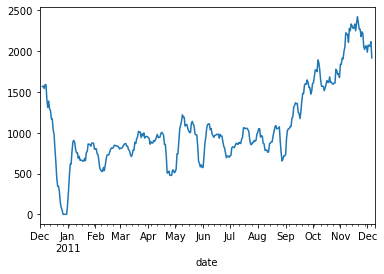

In [270]:
decomposition.trend.plot();

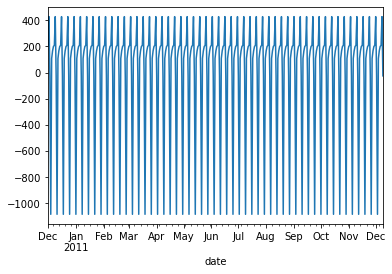

In [271]:
decomposition.seasonal.plot();

<AxesSubplot:xlabel='date'>

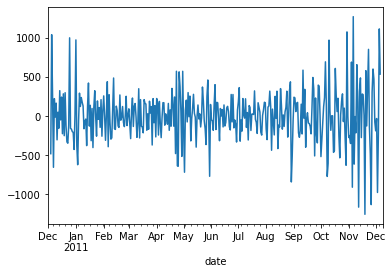

In [272]:
decomposition.resid.plot()

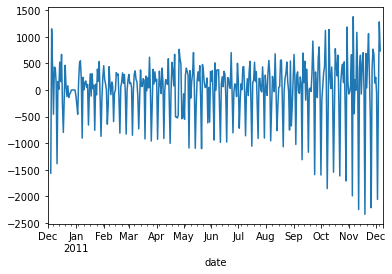

In [273]:
# detrend 
detrend = pre_dataset['Sale'] - decomposition.trend 
detrend.plot();

In [274]:
decomposition_mul = sm.tsa.seasonal_decompose(pre_dataset['Sale'], model = 'multiplicative')
decomposition_mul

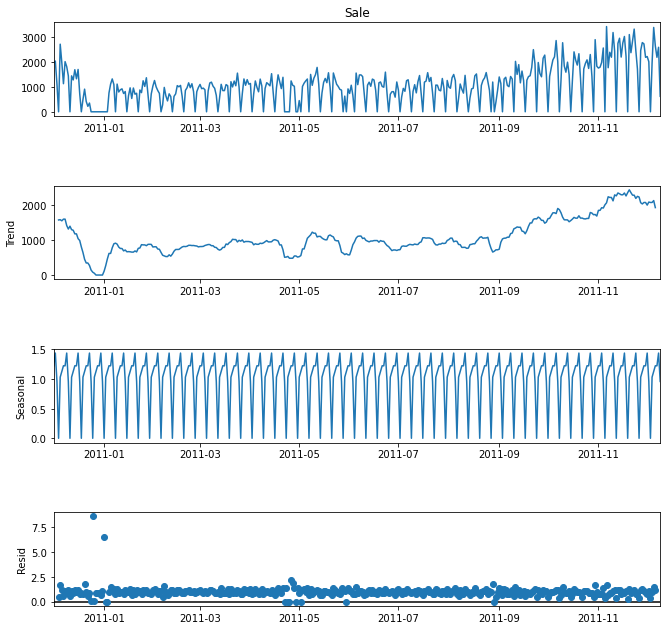

In [275]:
fig = decomposition_mul.plot() 
fig.set_size_inches(10, 10)
plt.show()

### Normalization, train_test_split

In [276]:
train_set, test_set = train_test_split(pre_dataset, test_size = 0.2, shuffle=False)

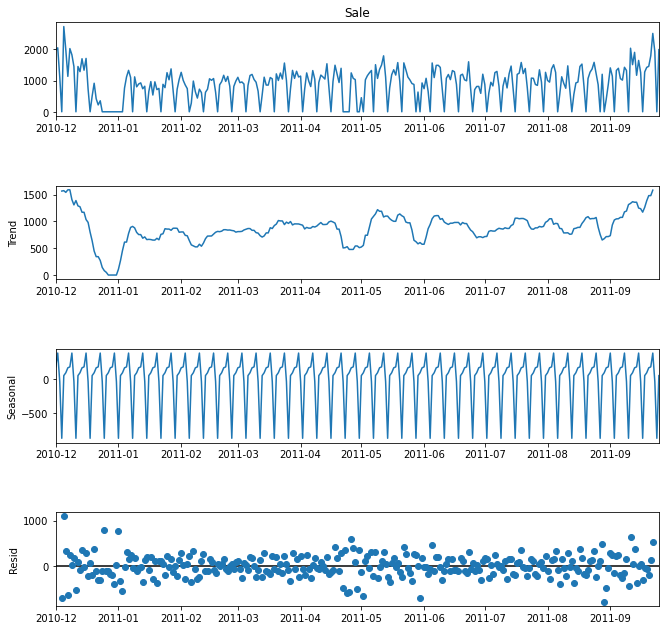

In [277]:
train_decompose = sm.tsa.seasonal_decompose(train_set.loc[:,'Sale'], model = 'additive')
fig = train_decompose.plot()
fig.set_size_inches(10, 10)

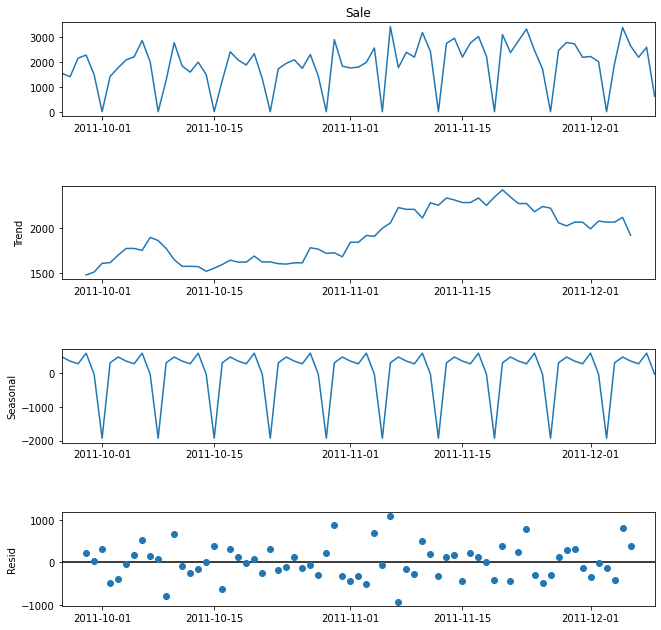

In [278]:
train_decompose = sm.tsa.seasonal_decompose(test_set.loc[:,'Sale'], model = 'additive')
fig = train_decompose.plot()
fig.set_size_inches(10, 10)

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


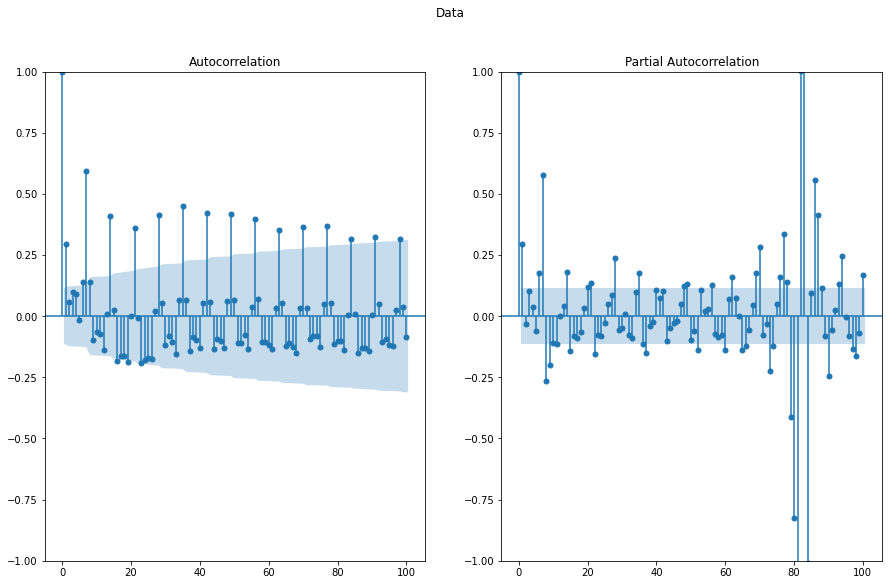

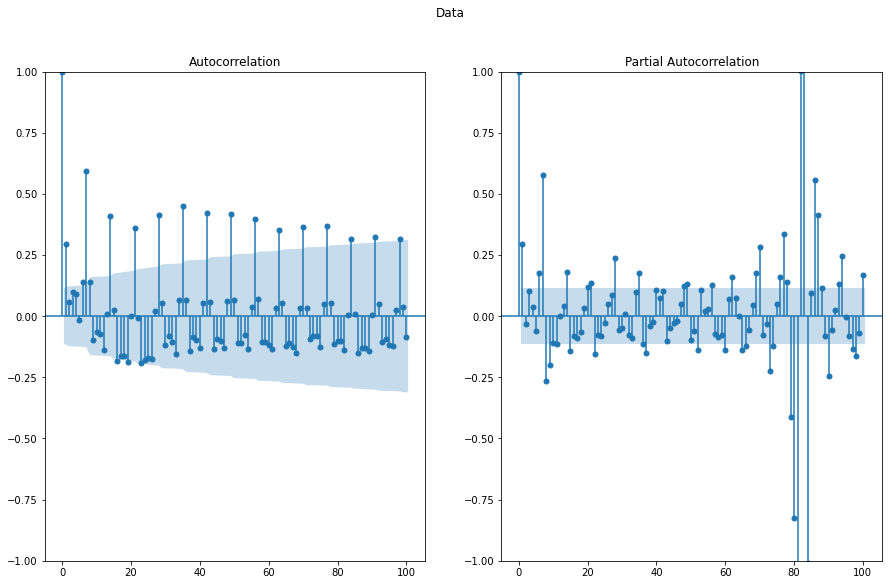

In [279]:
# before normalization
fig, ax = plt.subplots(1, 2, figsize = (15, 9))
fig.suptitle('Data')
sm.graphics.tsa.plot_acf(train_set.loc[:,'Sale'], lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_set.loc[:,'Sale'], lags=100, ax=ax[1])

In [323]:
# log scale
log_train_set = np.log(train_set.copy())

# difference 
log_diff_train_set = log_train_set['Sale'].diff()
log_diff_train_set.dropna(inplace=True)

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


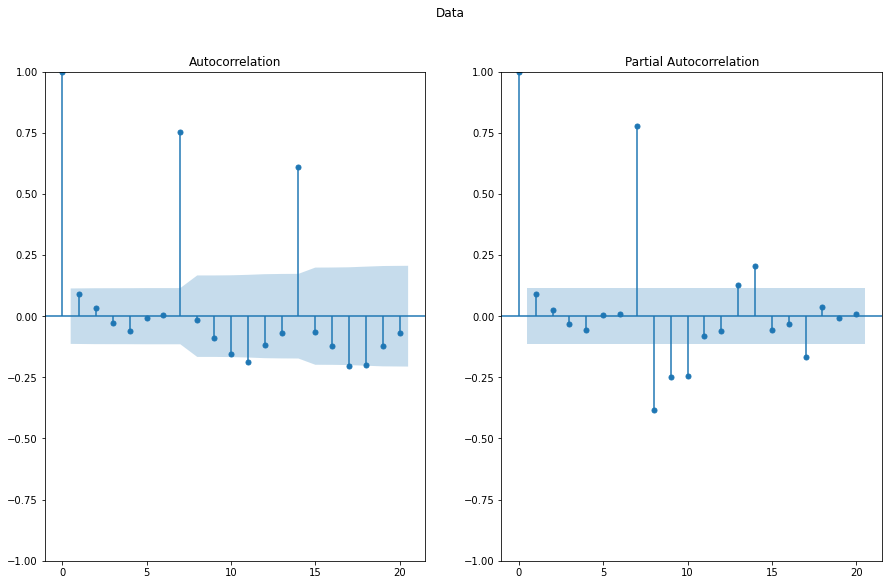

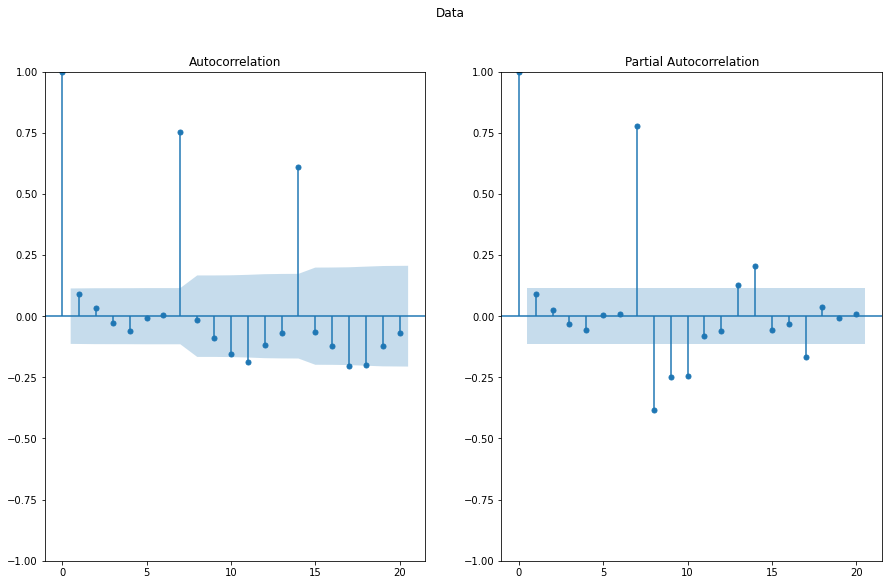

In [324]:
fig, ax = plt.subplots(1, 2, figsize = (15, 9))
fig.suptitle('Data')
sm.graphics.tsa.plot_acf(log_train_set, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(log_train_set, lags=20, ax=ax[1])

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


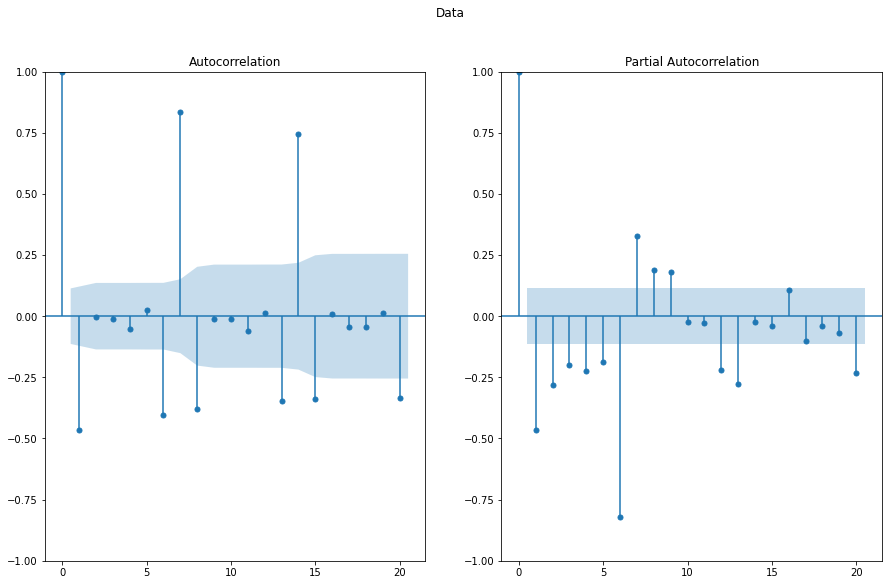

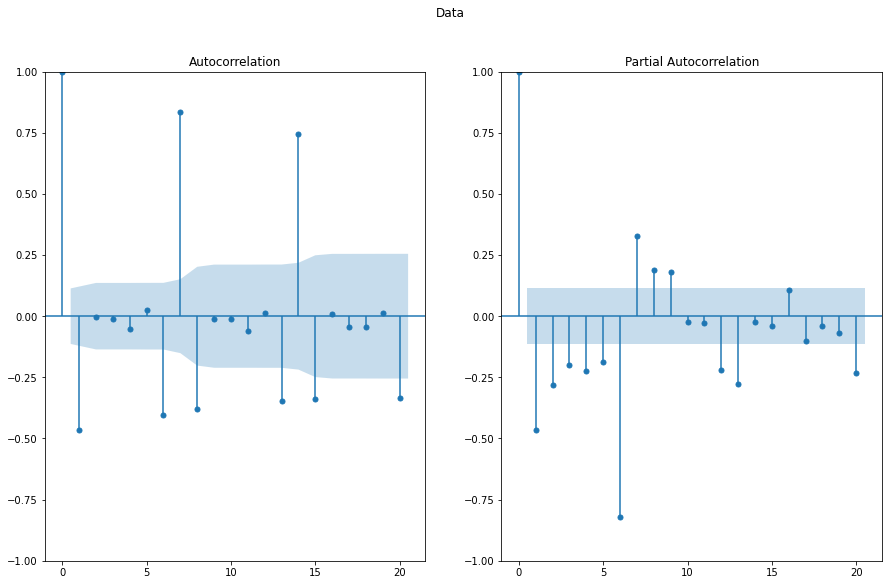

In [325]:
fig, ax = plt.subplots(1, 2, figsize = (15, 9))
fig.suptitle('Data')
sm.graphics.tsa.plot_acf(log_diff_train_set, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(log_diff_train_set, lags=20, ax=ax[1])

In [320]:
diff_train = train_set['Sale'].diff()
diff_train.dropna(inplace = True)

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


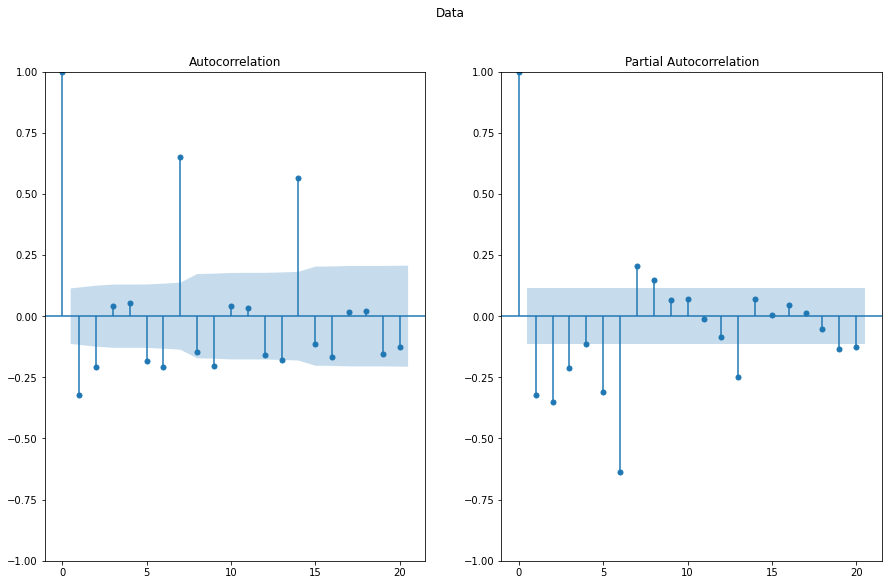

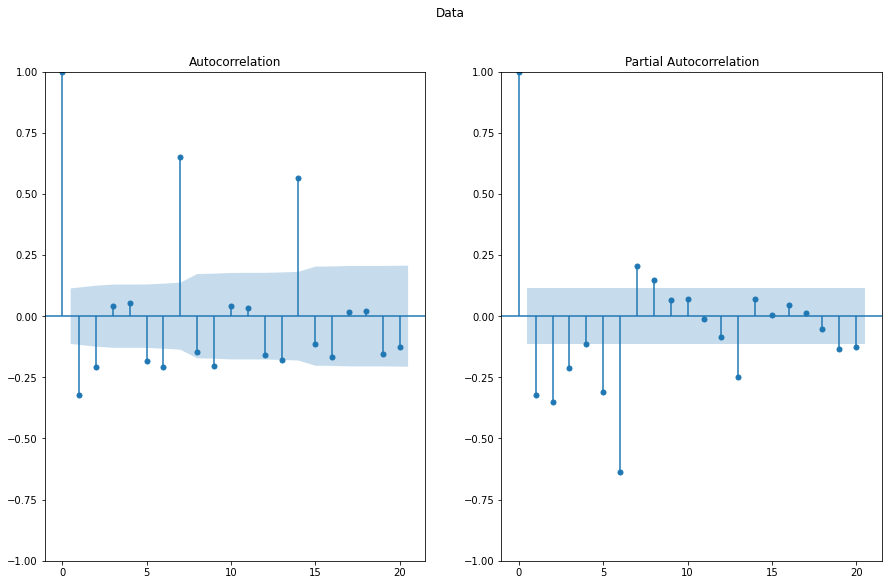

In [321]:
# after normalization

fig, ax = plt.subplots(1, 2, figsize = (15, 9))
fig.suptitle('Data')
sm.graphics.tsa.plot_acf(diff_train, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train, lags=20, ax=ax[1])

In [333]:
log_test_set = np.log(test_set.copy())

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


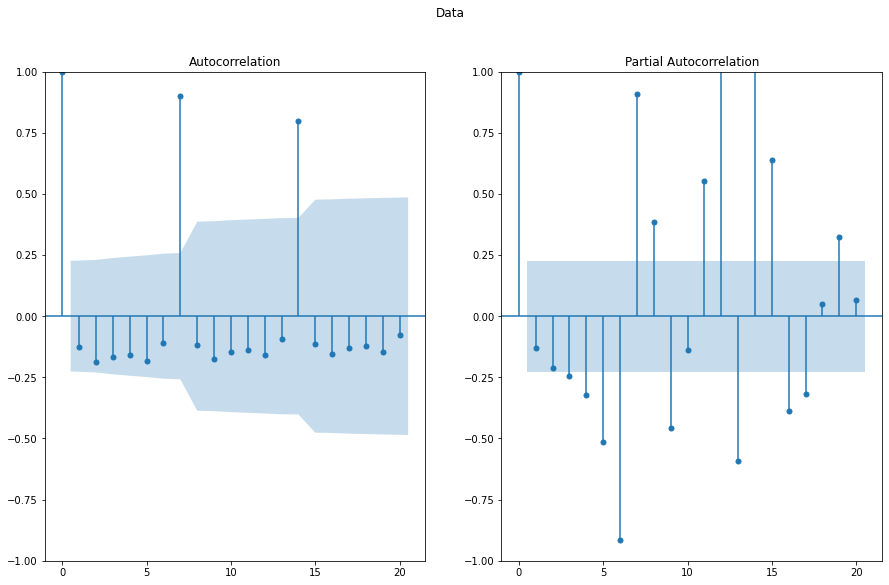

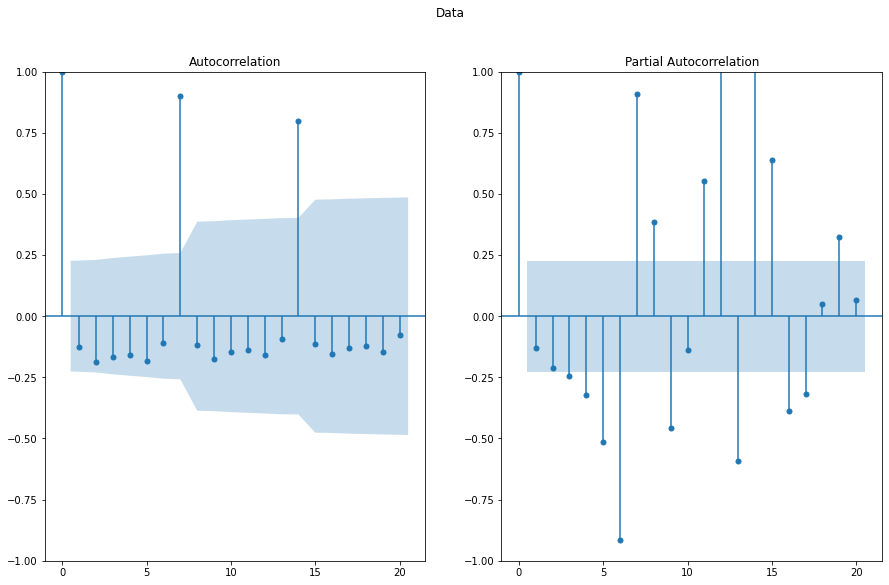

In [334]:
fig, ax = plt.subplots(1, 2, figsize = (15, 9))
fig.suptitle('Data')
sm.graphics.tsa.plot_acf(log_test_set, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(log_test_set, lags=20, ax=ax[1])

### Log scale만 한 경우 성능이 더 좋다. 

In [327]:
model = SARIMAX(log_train_set.values, order=(3,0,9))
history = model.fit()
history.summary()

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  299
Model:               SARIMAX(3, 0, 9)   Log Likelihood                -637.594
Date:                Sat, 14 May 2022   AIC                           1301.189
Time:                        17:04:17   BIC                           1349.294
Sample:                             0   HQIC                          1320.443
                                - 299                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1276      0.094      1.364      0.173      -0.056       0.311
ar.L2          0.9822      0.015     63.517      0.000       0.952       1.013
ar.L3         -0.1099      0.095     -1.160      0.246      -0.296       0.076
ma.L1          0.0778      0.088      0.881      0.378      -0.095       0.251
ma.L2         -0.9007      0.073    -12.372      0.000      -1.043      -0.758
ma.L3          0.0427      0.086      0.495      0.620      -0.126       0.212
ma.L4         -0.0347      0.086     -0.403      0.687      -0.204       0.134
ma.L5         -0.0075      0.058     -0.128      0.898      -0.122       0.107
ma.L6         -0.0861      0.073     -1.183      0.237      -0.229       0.057
ma.L7          0.5951      0.060      9.843      0.000       0.477       0.714
ma.L8          0.0637      0.067      0.952      0.341      -0.067       0.195
ma.L9         -0.7032      0.052    -13.653      0.000      -0.804      -0.602
sigma2         4.0133      0.447      8.981      0.000       3.137       4.889
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                59.64
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.99
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [335]:
model = SARIMAX(log_test_set.values, order=(3,0,9))
history = model.fit()
history.summary()

c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Bigdata21\anaconda3\envs\khu\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(3, 0, 9)   Log Likelihood                -129.247
Date:                Sat, 14 May 2022   AIC                            284.494
Time:                        17:07:15   BIC                            314.622
Sample:                             0   HQIC                           296.524
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7996      0.026    -31.128      0.000      -0.850      -0.749
ar.L2          0.8025      0.010     84.325      0.000       0.784       0.821
ar.L3          0.9971      0.017     58.270      0.000       0.964       1.031
ma.L1          0.5534      0.141      3.916      0.000       0.276       0.830
ma.L2         -1.7152      0.163    -10.523      0.000      -2.035      -1.396
ma.L3         -0.8730      0.260     -3.357      0.001      -1.383      -0.363
ma.L4          0.4669      0.293      1.592      0.111      -0.108       1.042
ma.L5         -0.4801      0.282     -1.700      0.089      -1.034       0.073
ma.L6          0.8631      0.263      3.287      0.001       0.349       1.378
ma.L7          1.7262      0.192      9.014      0.000       1.351       2.102
ma.L8         -0.5329      0.147     -3.615      0.000      -0.822      -0.244
ma.L9         -0.9919      0.117     -8.448      0.000      -1.222      -0.762
sigma2         1.1798      0.337      3.500      0.000       0.519       1.841
===================================================================================
Ljung-Box (L1) (Q):                   3.99   Jarque-Bera (JB):                 9.38
Prob(Q):                              0.05   Prob(JB):                         0.01
Heteroskedasticity (H):               0.90   Skew:                            -0.86
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+17. Standard errors may be unstable.
"""

In [336]:
pred = history.get_forecast(len(log_test_set))

In [340]:
pred_df = pd.DataFrame()
pred_df['mean'] = pred.predicted_mean # mean -> 예측값

In [343]:
# ARIMA 모델의 차수를 찾는 과정을 자동화.
# p,d,q <= 어떤게 최적인지 찾는 부분을 자동화.
# sklearn의 grid_search와 비슷한 형태.
# p는 ARIMA 항에 대한 하이퍼파라미터, P처럼 대문자는 seasonality에 대한 하이퍼파라미터
auto_arima_model = auto_arima(log_train_set, start_p = 1, start_q = 1,
                              max_p = 9, max_q = 9, m = 12, seasonal=False,
                              d = 1,
                              trace=True,
                              error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1638.152, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1566.422, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1636.152, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1544.504, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1534.677, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1522.062, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1514.218, Time=0.07 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1204.785, Time=0.09 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=1162.255, Time=0.19 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=1152.781, Time=0.21 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=1147.206, Time=0.26 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=1151.087, Time=0.58 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=1

In [344]:
                                           # ARIMA 차수     # 계절성 차트의 차수.                        
opt_model = SARIMAX(log_train_set.values, order=(9, 1, 0))
opt_model_fit = opt_model.fit()

In [345]:
pred = opt_model_fit.get_forecast(len(log_test_set))
predicted_values = np.exp(pred.predicted_mean)

In [346]:
from sklearn.metrics import r2_score

In [373]:
np.exp(pred.conf_int()[:,1])


array([3.23656517e+04, 3.22128924e+04, 5.58073337e+04, 6.33938583e+04,
       6.39290929e+04, 9.05669260e+01, 5.98611749e+04, 1.59306626e+05,
       1.57320650e+05, 2.85324727e+05, 2.59471944e+05, 3.13262463e+05,
       1.02794794e+03, 2.61529990e+05, 5.25688718e+05, 5.02655910e+05,
       9.28425388e+05, 7.14277303e+05, 9.75139507e+05, 6.67780048e+03,
       7.48049853e+05, 1.34678122e+06, 1.25494764e+06, 2.33801515e+06,
       1.60133070e+06, 2.37556337e+06, 3.10776973e+04, 1.72454725e+06,
       2.95279831e+06, 2.69860524e+06, 5.03043590e+06, 3.19064449e+06,
       4.98690388e+06, 1.15242423e+05, 3.50602658e+06, 5.84705835e+06,
       5.26722666e+06, 9.75298528e+06, 5.90411089e+06, 9.49272089e+06,
       3.61439877e+05, 6.57733689e+06, 1.07860589e+07, 9.61616041e+06,
       1.75774030e+07, 1.03928318e+07, 1.68794858e+07, 9.95522603e+05,
       1.16780685e+07, 1.88913856e+07, 1.67257754e+07, 3.00296806e+07,
       1.76480617e+07, 2.85652789e+07, 2.47083940e+06, 1.99238902e+07,
      

In [347]:
predicted_values = np.exp(pred.predicted_mean)
pred_lb = np.exp(pred.conf_int()[:,0]) # lb => lower bound
pred_ub = np.exp(pred.conf_int()[:,1]) # ub => upper bound

In [354]:
test_set

,Sale
date,
2011-09-26,1545.0
2011-09-27,1411.0
2011-09-28,2159.0
2011-09-29,2285.0
2011-09-30,1493.0
...,...
2011-12-05,3398.0
2011-12-06,2654.0
2011-12-07,2196.0


In [358]:
log_dataset = np.log(pre_dataset.copy())
log_dataset

,Sale
date,
2010-12-01,7.584773
2010-12-02,7.622664
2010-12-03,7.018402
2010-12-04,0.000000
2010-12-05,7.909857
...,...
2011-12-05,8.130942
2011-12-06,7.883823
2011-12-07,7.694393


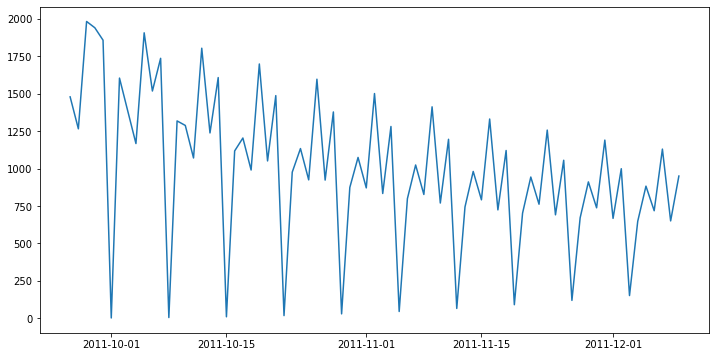

In [376]:
fig = plt.figure(figsize = (12,6)) # 큰 그림 하나 준비.
ax = fig.add_subplot(111)
ax.plot(pred_index, predicted_values, label='Prediction')
plt.show()

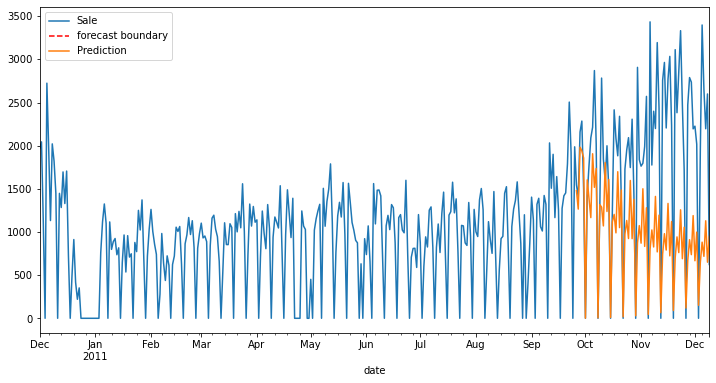

In [377]:
fig = plt.figure(figsize = (12,6)) # 큰 그림 하나 준비.
ax = fig.add_subplot(111)

pred_index = list(log_test_set.index) # 예측 시작 기준점.

pre_dataset.plot(ax=ax)
ax.vlines('2011-09-26', 0, 5, linestyle='--', color='r', label='forecast boundary') # 예측을 시작할 기준점에다가 라인을 그림
# ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval') # 예측 시작한 후 기준 점 다음에, 상한 / 하한.
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.show()